In [1]:
# Project Number 6 : Customer Service Requests Analysis.
# Submitted By - Gaurav Patil 
# Date  - 01-08-2022
# Email - gauravpatildoc@gmail.com
#-----------------------------------------------------------------------------------------
# Objective -  1.Utilize data wrangling techniques to understand the pattern in the data &
#              2.Visualize the major types of complaints
#------------------------------------------------------------------------------------------

In [2]:
# Importing all the required Libraries for the Project
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#-----------------------------------------------------------------------------
#1 Understanding the dataset.
# Importing the given Dataset, Reading it and Converting it into  a dataframe.
#-----------------------------------------------------------------------------
customer_service_request_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\gaura\AppData\Local\Temp\ipykernel_25524\3685553808.py:5: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_service_request_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [4]:
# Printing the Dataset to see the Dataframe created
customer_service_request_df


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [5]:
#1.1 Finding out the shape of Dataframe
customer_service_request_df.shape

(364558, 53)

In [6]:
#1.2 Identifying variables with Null Values
customer_service_request_df.isnull().values.any()
customer_service_request_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [7]:
customer_service_request_df['complaint_Count'] = 1

In [8]:
#2.1 Dropping the Unnecessary Columns from DataFrame to Make it more Clean and Accessible.
#    Dropping Columns With all Null or NaN Values. 
customer_service_request_df = customer_service_request_df.drop(['School or Citywide Complaint',
                                                                'Vehicle Type','Taxi Company Borough',
                                                                'Taxi Pick Up Location',
                                                                'Bridge Highway Name',
                                                                'Bridge Highway Direction','Road Ramp',
                                                                'Bridge Highway Segment',
                                                                'Garage Lot Name',
                                                                'Ferry Direction',
                                                                'Ferry Terminal Name',
                                                                'Landmark',
                                                                'Intersection Street 1',
                                                                'Intersection Street 2',
                                                                'Cross Street 1',
                                                                'Cross Street 2',
                                                                'Unique Key',
                                                                'X Coordinate (State Plane)',
                                                                'Y Coordinate (State Plane)',
                                                                'Latitude',
                                                                'Longitude'
                                                                
                                                                
                                                               ], axis = 1)

In [9]:
#2.2 
#Creating Datetime Seres Columns for 'Created Date' 'Closed Date' to determine response time
customer_service_request_df['Created Date'] = pd.to_datetime(customer_service_request_df['Created Date'])
customer_service_request_df['Closed Date'] = pd.to_datetime(customer_service_request_df['Closed Date'])

In [10]:
# Creating a new Column for Response time in Hours to analyze average response time
customer_service_request_df['Response Time in Hours'] = (customer_service_request_df['Closed Date']- customer_service_request_df['Created Date'])/np.timedelta64(1,'h') 

In [11]:
# Checking the values in Response Time in Hours to determine if there are any inconsistencies in the data available.
# Logic here is if there are any entries where timeline for Complaint Closed precedes Complaint Created which would be Incorrect 
customer_service_request_df[customer_service_request_df['Response Time in Hours'] < 0 ]

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Location,complaint_Count,Response Time in Hours


In [12]:
#2.3 
#Plotting a frequency plot for city-wise complaints
#------------------------------------------------------------------------------------------------------
new_group_df = pd.DataFrame(customer_service_request_df.groupby(['City','Complaint Type','Incident Zip']).agg('sum'))


In [13]:
city_wise_complaints_df = pd.DataFrame(customer_service_request_df.groupby('City').agg('sum'))
city_wise_complaints_df.drop('Incident Zip',axis = 1, inplace = True)

In [14]:
city_wise_complaints_df.reset_index(inplace=True)

[Text(0.5, 1.0, 'City Wise Complaints')]

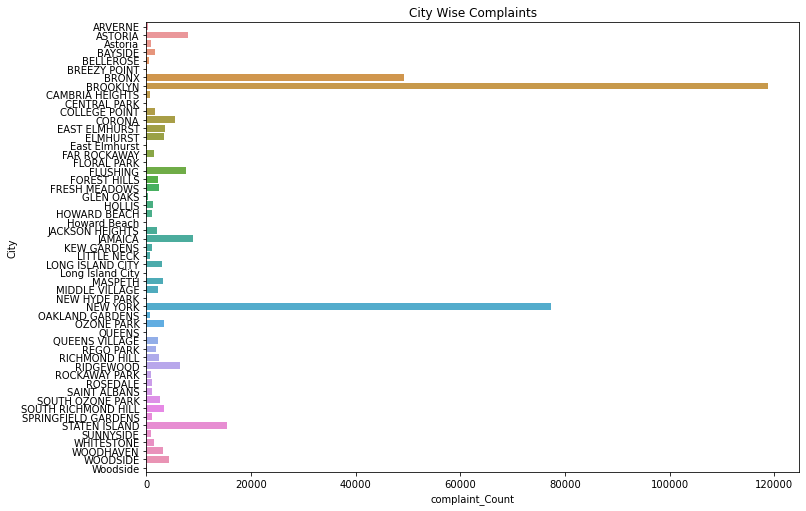

In [15]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(    
        data=city_wise_complaints_df,
        y="City", 
        x="complaint_Count", 
        orient = 'h' ,
    ax=ax
        ).set(title ='City Wise Complaints')


In [16]:
#2.4 
#Plotting scatter and hexbin plots for complaint concentration across Brooklyn

In [17]:
brooklyn_df = customer_service_request_df[customer_service_request_df['City']=='BROOKLYN']
brooklyn_df_gp = brooklyn_df.groupby('Incident Zip').agg('sum')
brooklyn_df_gp.reset_index(inplace = True)


Text(0.5, 0.98, 'Complaint Concentration across Brooklynn')

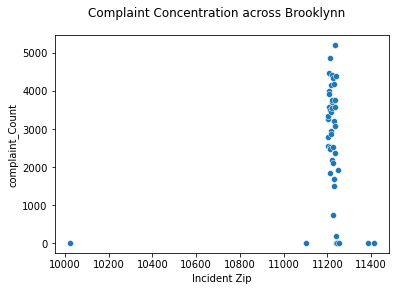

In [18]:
sns.scatterplot(data = brooklyn_df_gp,x='Incident Zip',y='complaint_Count')
plt.suptitle("Complaint Concentration across Brooklynn")

Text(0.5, 0.98, 'Complaint Concentration across Brooklynn')

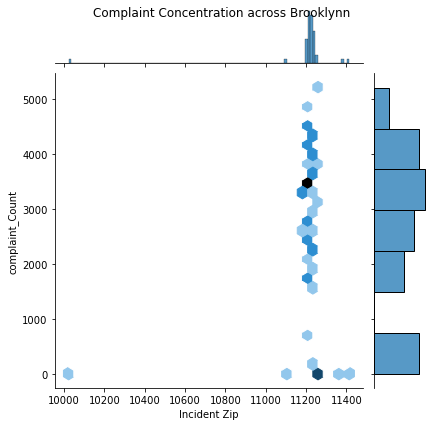

In [19]:
sns.jointplot(data = brooklyn_df_gp,x='Incident Zip',y='complaint_Count',kind='hex')
plt.suptitle("Complaint Concentration across Brooklynn")

In [20]:
#-----------------------------------------------------------------------------------------------------------------------
# Some EDA on Request Closing Time

In [21]:
customer_service_request_df['Created Date'].isnull().sum()

0

In [22]:
customer_service_request_df['Closed Date'].isnull().sum()

2381

In [23]:
customer_service_request_df['Request Closing Time'] =customer_service_request_df['Closed Date']-customer_service_request_df['Created Date']

In [24]:
#Finding out NaN values in new created column.
customer_service_request_df['Request Closing Time'].isnull().sum()

2381

In [25]:
customer_service_request_df['Request Closing Time'].describe()

count                       362177
mean     0 days 04:11:53.299632500
std      0 days 05:51:42.547519569
min                0 days 00:01:01
25%                0 days 01:15:33
50%                0 days 02:40:16
75%                0 days 05:14:38
max               24 days 16:52:22
Name: Request Closing Time, dtype: object

In [26]:
customer_service_request_df['Response Time in Hours'].describe()

count    362177.000000
mean          4.198139
std           5.861819
min           0.016944
25%           1.259167
50%           2.671111
75%           5.243889
max         592.872778
Name: Response Time in Hours, dtype: float64

In [27]:
#Finding out mean request clsoing time
customer_service_request_df['Request Closing Time'].mean()

Timedelta('0 days 04:11:53.299632500')

In [28]:
mean_request_closing_value = customer_service_request_df['Request Closing Time'].mean()

In [29]:
mean_request_closing_value

Timedelta('0 days 04:11:53.299632500')

In [30]:
#Request closing time has some NaN values which could be Open requests.
#Replacing these values with the mean Request Closing time
customer_service_request_df['Request Closing Time'].fillna(value=mean_request_closing_value, inplace = True)

In [31]:
customer_service_request_df['Request Closing Time'].isnull().sum()

0

In [32]:
customer_service_request_df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [33]:
#3.1 
#Plot a bar graph of count vs. complaint types
complaint_type_count_df = pd.DataFrame(customer_service_request_df.groupby('Complaint Type').agg(sum))
complaint_type_count_df.drop('Incident Zip',axis = 1, inplace = True)
complaint_type_count_df.reset_index(inplace=True)

[Text(0.5, 1.0, ' Complaint Count vs. Complaint types')]

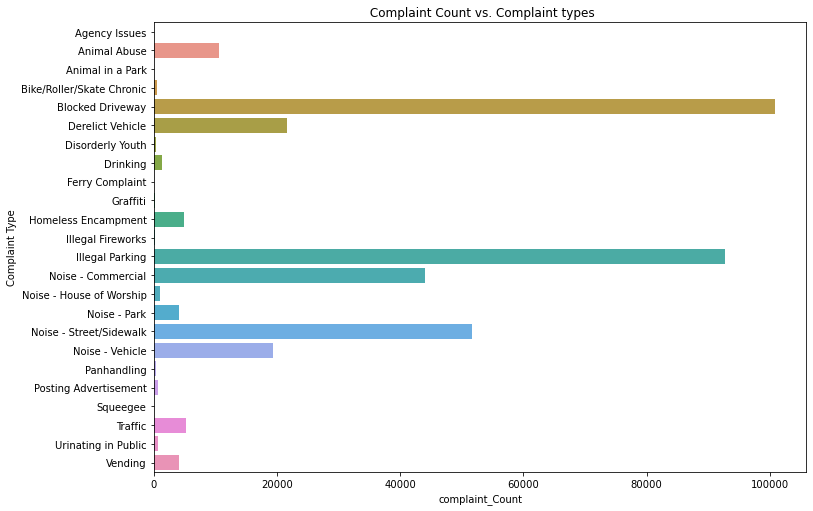

In [34]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(    
        data=complaint_type_count_df,
        x="complaint_Count", 
        y="Complaint Type", 
        orient = 'h' ,
    ax=ax
        ).set(title=' Complaint Count vs. Complaint types')

In [35]:
#3.2 Finding the top 10 types of complaints
top_ten_complaint_types_df = pd.DataFrame(customer_service_request_df.groupby('Complaint Type').agg(sum))
top_ten_complaint_types_df.reset_index(inplace=True)
top_ten_complaint_types_df['Rank'] = top_ten_complaint_types_df['complaint_Count'].rank(ascending= False)
top_ten_complaint_types_df.reset_index(inplace = True)

In [36]:
top_ten_complaint_types_new_df = top_ten_complaint_types_df[top_ten_complaint_types_df['Rank']<11].sort_values('Rank')

[Text(0.5, 1.0, 'Top Ten Complaint Types')]

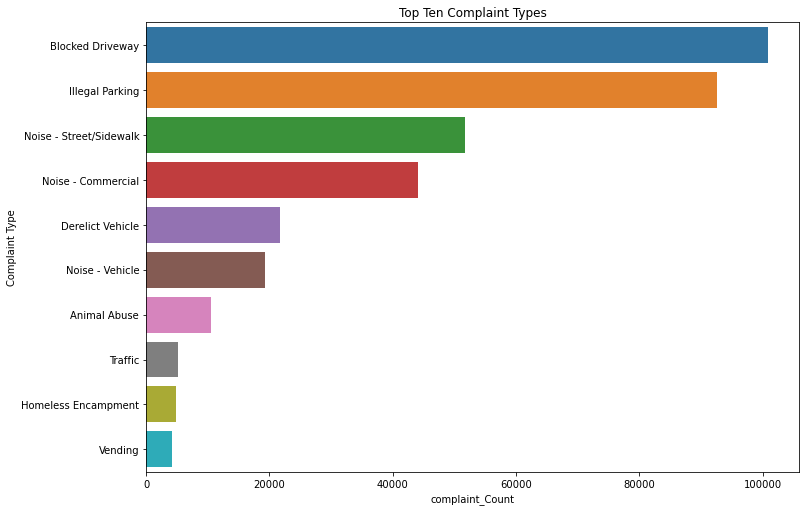

In [37]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(    
        data=top_ten_complaint_types_new_df,
        x="complaint_Count", 
        y="Complaint Type", 
        orient = 'h' ,
    ax=ax
        ).set(title='Top Ten Complaint Types')

In [38]:
#3.3
# Displaying the types of complaints in each city in a separate dataset
city_wise_complaint_types = pd.DataFrame(customer_service_request_df.groupby(['City','Complaint Type']).agg('sum'))
city_wise_complaint_types.reset_index(inplace=True)
with pd.option_context('display.max_rows', None,):
   print(city_wise_complaint_types[['City','Complaint Type']])

                    City             Complaint Type
0                ARVERNE               Animal Abuse
1                ARVERNE           Blocked Driveway
2                ARVERNE           Derelict Vehicle
3                ARVERNE           Disorderly Youth
4                ARVERNE                   Drinking
5                ARVERNE                   Graffiti
6                ARVERNE        Homeless Encampment
7                ARVERNE            Illegal Parking
8                ARVERNE         Noise - Commercial
9                ARVERNE   Noise - House of Worship
10               ARVERNE               Noise - Park
11               ARVERNE    Noise - Street/Sidewalk
12               ARVERNE            Noise - Vehicle
13               ARVERNE                Panhandling
14               ARVERNE                    Traffic
15               ARVERNE        Urinating in Public
16               ARVERNE                    Vending
17               ASTORIA               Animal Abuse
18          

In [39]:
#4.0
#Visualizing the major types of complaints in each city
customer_service_request_df['rank'] = customer_service_request_df.groupby(['City','Complaint Type'])['complaint_Count'].rank()


In [40]:
ranked_citiwise = pd.DataFrame(customer_service_request_df.groupby(['City','Complaint Type']).agg('sum'))

In [41]:
#
ranked_citiwise['rank'] = ranked_citiwise.groupby(['City'])['complaint_Count'].rank('dense',ascending= False)

In [42]:
#
top_complaints_by_city = ranked_citiwise[ranked_citiwise['rank'] <=3].sort_values('rank')
top_complaints_by_city.reset_index(inplace = True)

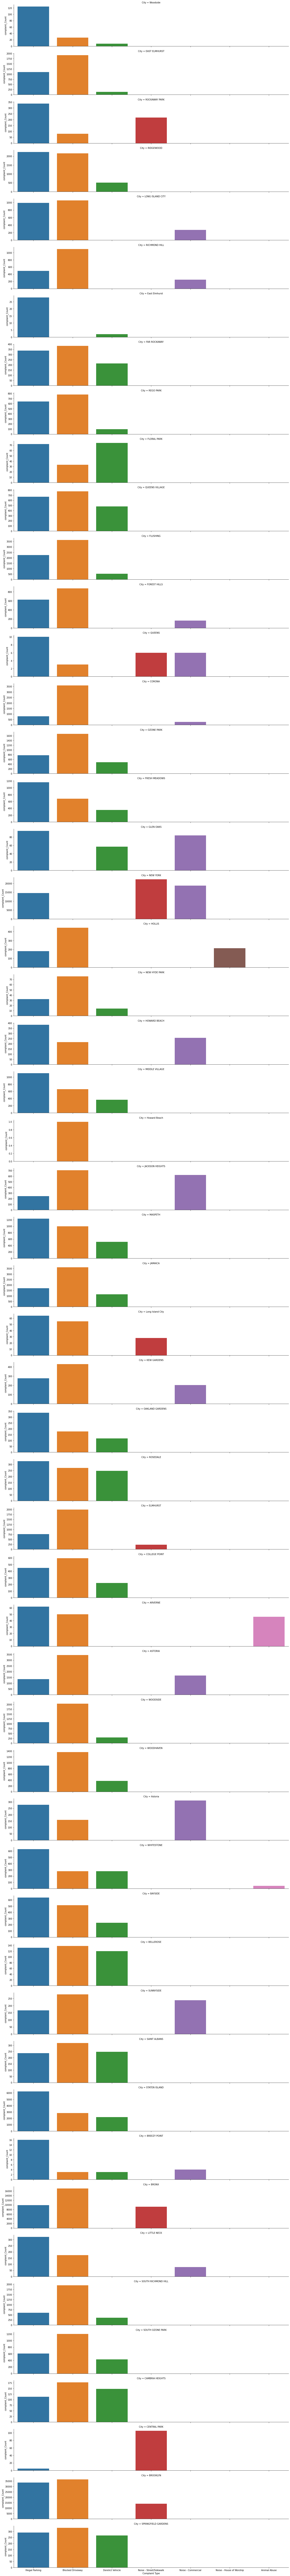

In [43]:
sns.catplot(    
        data=top_complaints_by_city,
        x="Complaint Type", 
        y="complaint_Count",
        kind="bar",
        col="City",
        col_wrap=1,
        sharey=False,
        legend = True,
        height = 3, aspect =6
)

[Text(0.5, 1.0, 'Average Response Time Vs Complaint Type')]

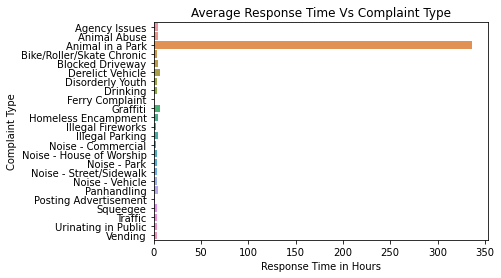

In [44]:
#5.0
#Checking the average response time across various types of complaints
response_time_by_complaint_type_df = pd.DataFrame(customer_service_request_df.groupby(['Complaint Type']).agg('mean'))
response_time_by_complaint_type_df.reset_index(inplace=True)
sns.barplot(    
        data=response_time_by_complaint_type_df,
        y="Complaint Type", 
        x="Response Time in Hours", 
        orient = 'h' 
        ).set(title='Average Response Time Vs Complaint Type')


C:\Users\gaura\AppData\Local\Temp\ipykernel_25524\2622978466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_time_by_complaint_type_df_without_outlier['avg response Time'] = response_time_by_complaint_type_df_without_outlier['Response Time in Hours'].mean()


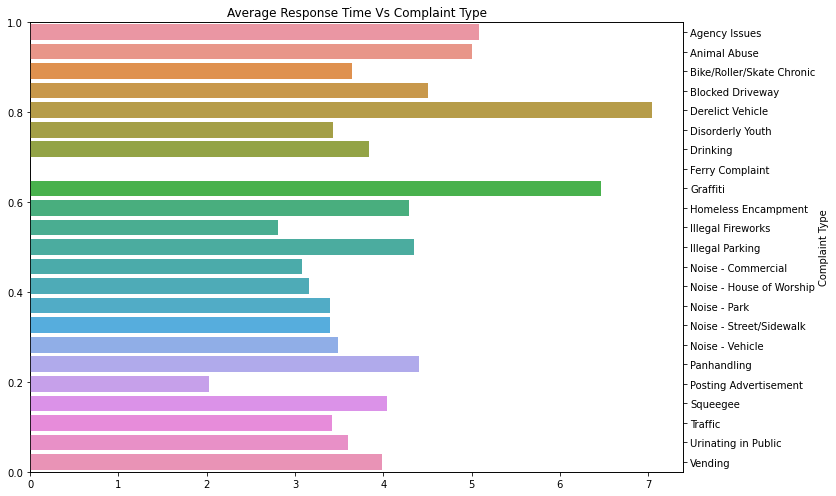

In [45]:
# From above visualization removing the outlier 'Animal in Park'. and  
# Again plotting the average response time across various types of complaints
response_time_by_complaint_type_df_without_outlier = response_time_by_complaint_type_df[response_time_by_complaint_type_df['Complaint Type']!='Animal in a Park']
response_time_by_complaint_type_df_without_outlier['avg response Time'] = response_time_by_complaint_type_df_without_outlier['Response Time in Hours'].mean()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax1 = ax.twinx()

g1 =sns.barplot(
        data=response_time_by_complaint_type_df_without_outlier,
        y="Complaint Type", 
        x="Response Time in Hours", 
        orient = 'h'
        
).set(title='Average Response Time Vs Complaint Type')

In [46]:
# Printing the Response time by Complaint type for referrence
print(response_time_by_complaint_type_df_without_outlier[['Complaint Type','Response Time in Hours']])

               Complaint Type  Response Time in Hours
0               Agency Issues                5.080312
1                Animal Abuse                5.009043
3   Bike/Roller/Skate Chronic                3.645469
4            Blocked Driveway                4.509034
5            Derelict Vehicle                7.044333
6            Disorderly Youth                3.434375
7                    Drinking                3.839250
8             Ferry Complaint                     NaN
9                    Graffiti                6.465651
10        Homeless Encampment                4.292051
11          Illegal Fireworks                2.809301
12            Illegal Parking                4.347343
13         Noise - Commercial                3.079378
14   Noise - House of Worship                3.164191
15               Noise - Park                3.396127
16    Noise - Street/Sidewalk                3.397582
17            Noise - Vehicle                3.489389
18                Panhandlin